In [11]:
# Importing the necessary libraries
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mysql import connector
import mysql

In [12]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
connection = mysql.connector.connect(host='18.136.157.135',
                                     user='dm_team2',
                                     password='DM!$Team&27@9!20!',
                                     database='project_sales')

In [14]:
classic=pd.read_sql_query('show tables', connection)

In [15]:
print(classic)

  Tables_in_project_sales
0                    data


In [16]:
query='select * from data'
data=pd.read_sql(query,connection)
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [17]:
data.shape

(7422, 9)

In [18]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [20]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [21]:
data.describe(include="O")

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


As we can see Mobile,Email,Created can be droped as it has no significance on model building because it has no revelance with sales

There are 30 Products 13 Sales Agent at 18 Locations and 26 Sources with 5 Delivery Modes

Data Type of all the columns is object 


In [22]:
# Dropping the columns which are of no significance\

data.drop(['Mobile'],axis=1,inplace=True)
data.drop(['EMAIL'],axis=1,inplace=True)
data.drop(['Created'],axis=1,inplace=True)

In [23]:
data.shape

(7422, 6)

In [24]:
# Dropping rows with missing data because they are few
data.replace('',np.nan,inplace=True)
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)
data.shape

(7328, 6)

In [25]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
2,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive


In [26]:
 #Compressing and Merging the labes in column
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.Source.replace('By Recommendation','Customer Referral',inplace=True)
data.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [27]:
data['Source'].unique()

array(['Live Chat', 'Call', 'Website', 'Customer Referral', 'Campaign',
       'Existing Customer'], dtype=object)

In [28]:
data['Location'].astype

<bound method NDFrame.astype of 0             Bangalore
1       Other Locations
2            Trivandrum
3             Hyderabad
4             Bangalore
             ...       
7323             Mumbai
7324    Other Locations
7325          Bangalore
7326    Other Locations
7327            Chennai
Name: Location, Length: 7328, dtype: object>

In [29]:
data.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)
data.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [30]:
# Defining 'Status' as 'Good' or 'Bad'
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Good',inplace=True)
data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Bad',inplace=True)

In [31]:
data['Status'].unique()

array(['Good', 'Bad'], dtype=object)

In [32]:
data['Product_ID'].unique()

array(['9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20', '11',
       '21', '1', '12', '13', '24', '26', '16', '23', '22', '8', '14',
       '6', '17', '0', '28', '7', '4'], dtype=object)

In [33]:
data['Product_ID']=data['Product_ID'].astype(int)

## Univariate Anilysis

<Axes: xlabel='Status'>

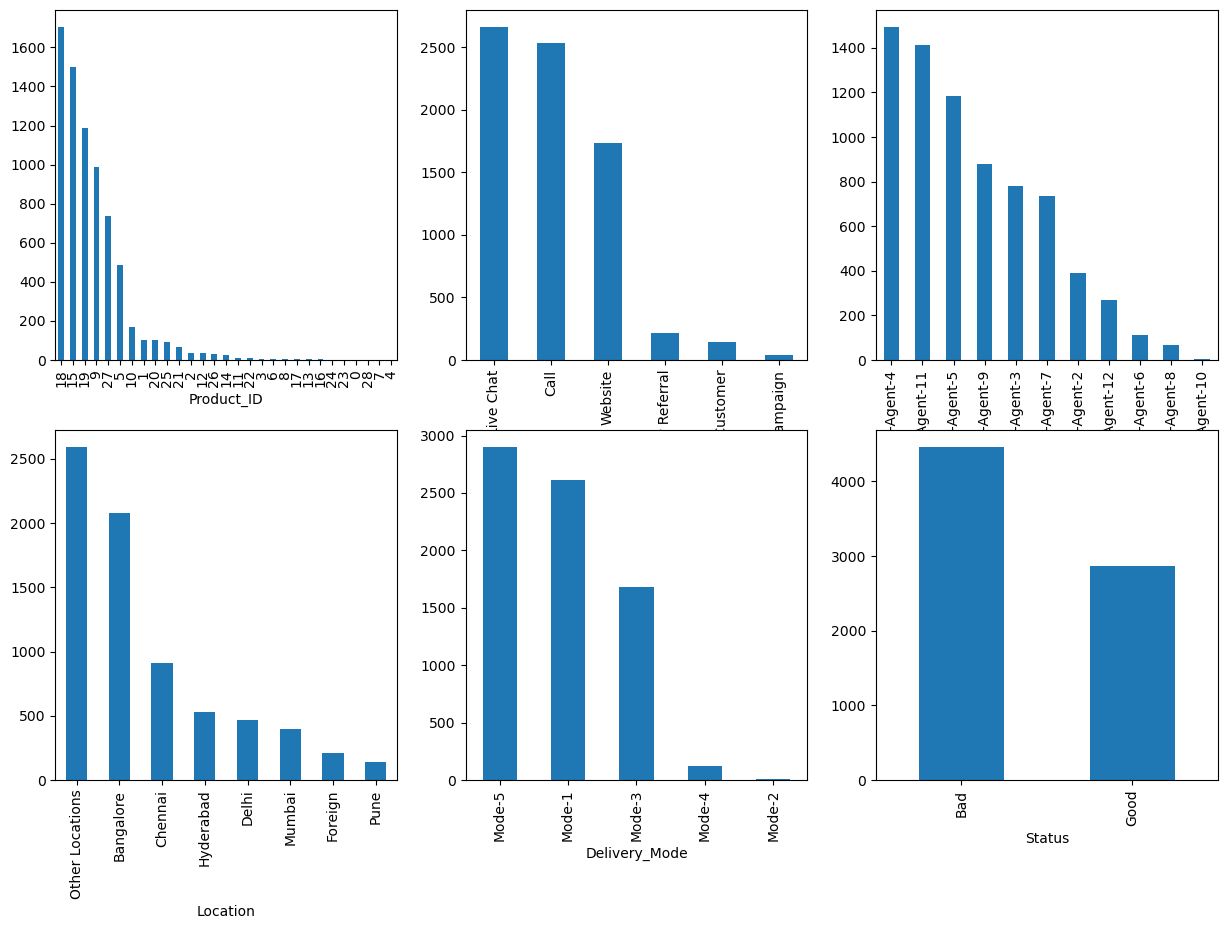

In [34]:
# Plotting the labels in each column
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
data.Product_ID.value_counts().plot(kind='bar')
plt.subplot(2,3,2)
data.Source.value_counts().plot(kind='bar')
plt.subplot(2,3,3)
data.Sales_Agent.value_counts().plot(kind='bar')
plt.subplot(2,3,4)
data.Location.value_counts().plot(kind='bar')
plt.subplot(2,3,5)
data.Delivery_Mode.value_counts().plot(kind='bar')
plt.subplot(2,3,6)
data.Status.value_counts().plot(kind='bar')

As we can see 

The data is supervised and categorical. 

The predictor variables are nominal.

The target variable 'Status' is nominal as well.

Most of the columns had a lot of different labels, so we compressed and merged the labels such that only the main ones were included and then used Label Encoding. 

The predictor variable was categorized into two types 'Good Lead' 
and 'Bad Lead'.



### Data Processing

In [35]:
#Label encoding to all the col

In [36]:
enc = LabelEncoder()
for i in ['Source','Location','Status']:
    data[i]=enc.fit_transform(data[i])
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,4,Sales-Agent-3,0,Mode-1,1
1,19,0,Sales-Agent-4,6,Mode-5,1
2,18,5,Sales-Agent-11,6,Mode-1,1
3,15,5,Sales-Agent-7,4,Mode-1,0
4,18,0,Sales-Agent-7,0,Mode-1,1


In [37]:
data['Source'].unique()

array([4, 0, 5, 2, 1, 3])

In [59]:
# Assuming X_train is a pandas DataFrame
encoder = LabelEncoder()

# For each categorical column, apply label encoding
categorical_cols = ['Sales_Agent', 'Delivery_Mode']  # adjust this list based on your actual categorical columns
for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])

In [39]:
enc = LabelEncoder()
for i in (0,1,2,3,4,5):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,4,4,0,0,1
1,19,0,5,6,4,1
2,18,5,1,6,0,1
3,15,5,8,4,0,0
4,18,0,8,0,0,1


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     7328 non-null   int64 
 1   Source         7328 non-null   int64 
 2   Sales_Agent    7328 non-null   object
 3   Location       7328 non-null   int64 
 4   Delivery_Mode  7328 non-null   object
 5   Status         7328 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 343.6+ KB


In [41]:
# Checking corelation coeffecient

In [42]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.063262,0.006529,-0.041902,-0.036025,0.085415
Source,0.063262,1.000000,-0.023186,-0.003034,-0.216516,-0.015411
Sales_Agent,0.006529,-0.023186,1.000000,-0.140876,-0.224688,0.137074
Location,-0.041902,-0.003034,-0.140876,1.000000,0.414193,-0.347418
Delivery_Mode,-0.036025,-0.216516,-0.224688,0.414193,1.000000,-0.220445
Status,0.085415,-0.015411,0.137074,-0.347418,-0.220445,1.000000


In [43]:
y = data.Status
X = data.iloc[:,[0,1,2,3,4]]

In [44]:
# Splitting into training and testing data for accuracy

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [45]:
X_train.shape

(5129, 5)

In [46]:
X_test.shape

(2199, 5)

In [47]:
# SMOTE for sampling technique
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

In [48]:
X_train.shape

(6294, 5)

In [49]:
X_test.shape

(2199, 5)

## Model creation 

### 1. Logistic Regression

In [50]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [51]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [52]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.6580263756252842
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1319
           1       0.56      0.66      0.61       880

    accuracy                           0.66      2199
   macro avg       0.65      0.66      0.65      2199
weighted avg       0.67      0.66      0.66      2199



In [53]:
print(confusion_matrix(y_test,y_predict_log))

[[868 451]
 [301 579]]


### 2. Support Vector Machine

In [54]:
# Training the model
from sklearn.svm import SVC
parameters = {'kernel': ['rbf'], 'gamma': [0.1,1,5], 'C': [0.1,1,10,100]}
rbf_svc = RandomizedSearchCV(SVC(),parameters).fit(X_train,y_train)

In [55]:
rbf_svc.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 1}

In [56]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [57]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.6784902228285584
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1319
           1       0.59      0.64      0.61       880

    accuracy                           0.68      2199
   macro avg       0.67      0.67      0.67      2199
weighted avg       0.68      0.68      0.68      2199



In [58]:
print(confusion_matrix(y_test,y_predict_svm))

[[931 388]
 [319 561]]


### 3. Decision Tree with GridSearchCV

In [60]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [61]:
model_griddtree.best_params_

{'criterion': 'gini', 'min_samples_split': 5}

In [62]:
# Predicting the model
y_predict_dtree = model_griddtree.predict(X_test)

In [63]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.6462028194633924
              precision    recall  f1-score   support

           0       0.73      0.64      0.69      1319
           1       0.55      0.65      0.59       880

    accuracy                           0.65      2199
   macro avg       0.64      0.65      0.64      2199
weighted avg       0.66      0.65      0.65      2199



In [64]:
print(confusion_matrix(y_test,y_predict_dtree))

[[850 469]
 [309 571]]


### 4. Random Forest with GridSearchCV

In [65]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [66]:
model_gridrf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [67]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [68]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.6361982719417917
              precision    recall  f1-score   support

           0       0.74      0.61      0.67      1319
           1       0.54      0.68      0.60       880

    accuracy                           0.64      2199
   macro avg       0.64      0.64      0.63      2199
weighted avg       0.66      0.64      0.64      2199



In [69]:
print(confusion_matrix(y_test,y_predict_rf))

[[804 515]
 [285 595]]


### 5. Naive Bayes Bernoulli

In [70]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB()

In [71]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [72]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))


0.6361982719417917
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1319
           1       0.54      0.55      0.55       880

    accuracy                           0.64      2199
   macro avg       0.62      0.62      0.62      2199
weighted avg       0.64      0.64      0.64      2199



In [73]:
print(confusion_matrix(y_test,y_predict_nb))

[[913 406]
 [394 486]]


### 6. K-Nearest Nieghbor

In [74]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [75]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [76]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.6593906321055025
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1319
           1       0.56      0.68      0.62       880

    accuracy                           0.66      2199
   macro avg       0.66      0.66      0.66      2199
weighted avg       0.68      0.66      0.66      2199



In [77]:
print(confusion_matrix(y_test,y_predict_knn))

[[849 470]
 [279 601]]


### 7. XGBoost Classifier

In [78]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=450,max_depth=17,gamma=5,learning_rate=0.01,random_state=10)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=17, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=450,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, ...)

In [79]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test.values)

In [80]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.6271032287403365
              precision    recall  f1-score   support

           0       0.77      0.55      0.64      1319
           1       0.52      0.75      0.62       880

    accuracy                           0.63      2199
   macro avg       0.64      0.65      0.63      2199
weighted avg       0.67      0.63      0.63      2199



In [81]:
print(confusion_matrix(y_test,y_predict_xgb))

[[719 600]
 [220 660]]


### 8. Artificial Neural Network

In [82]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [83]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [84]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.6439290586630286
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      1319
           1       0.54      0.69      0.61       880

    accuracy                           0.64      2199
   macro avg       0.65      0.65      0.64      2199
weighted avg       0.67      0.64      0.65      2199



In [85]:
print(confusion_matrix(y_test,y_predict_mlp))

[[805 514]
 [269 611]]


## Project Summary

### Requirement

FicZon Inc is an IT solution provider with products ranging from on-premises products to SAS based solutions. FicZon major leads generation channel is digital and through their website.

FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.

FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

### PROJECT GOAL:

Data exploration insights – Sales effectiveness.
ML model to predict the Lead Category.

## Analysis

The data is supervised and categorical. The predictor variables are nominal. The target variable 'Status' is nominal as well.
Most of the columns had a lot of different labels, so we compressed and merged the labels such that only the main ones were included and then used Label Encoding. The predictor variable was categorized into two types 'Good Lead' and 'Bad Lead'.
SMOTE is used ajdusting the sampling data. For training the data and predicting the target, algorithms used are Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbor, XGBoost Classifier,Artificial Neural Network

### Summary

The project is done with the purpose of finding out the Lead Quality, whether the lead should be followed or not. The company motive is to invest in the right prospects. So therefore we divided the Lead as 'Good' or 'Bad'. This resulted in increase of accuracy drastically. 

The following steps were carried out:

Import the data, find out the predictor and target and drop columns which has no use in analysis.

Compress and merge the labels such that only the main ones are included and use Label Encoding.

Split it into test and train and use SMOTE.

Train the data using algorithms like Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, 
Naive Bayes, K-Nearest Neighbor, XGBoost Classifier and Artificial Neural Network and check the accuracy to find out which algorithm is the best.

Export the model with highest accuracy.
Results
XGBoost Classifier gave an accuracy of 70%.